<a href="https://colab.research.google.com/github/AdShanks/schoolwork/blob/main/669_project_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from collections import Counter

In [5]:
file_path = "/content/data(in).csv"

# Load the dataset
data = pd.read_csv(file_path)

#Drop row with missing value
data = data.dropna(subset=['Class'])

# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Normalize the features using MinMax scaling (scaling each feature to range [0, 1])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Label encode the target
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)

# Train-Validation-Test split (70%-15%-15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_enc, test_size=0.3, random_state=42, stratify=y_enc)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

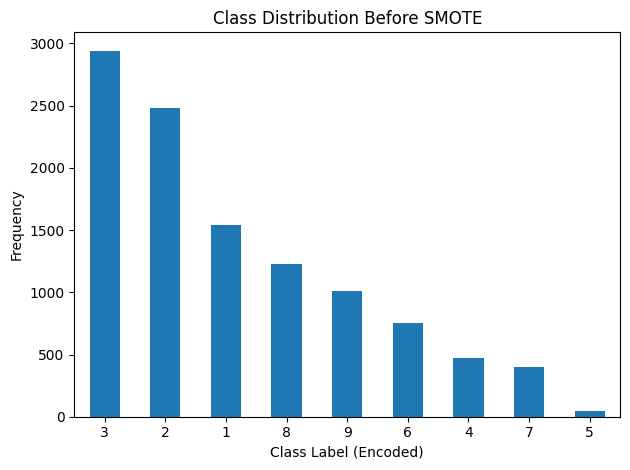

In [6]:
# Check class distribution
class_counts = data['Class'].value_counts()

# Visualize class imbalance
class_counts.plot(kind='bar')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class Label (Encoded)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Before SMOTE: Counter({np.int64(2): 2059, np.int64(1): 1734, np.int64(0): 1079, np.int64(7): 860, np.int64(8): 709, np.int64(5): 526, np.int64(3): 332, np.int64(6): 279, np.int64(4): 29})
After SMOTE: Counter({np.int64(1): 2059, np.int64(2): 2059, np.int64(5): 2059, np.int64(0): 2059, np.int64(7): 2059, np.int64(3): 2059, np.int64(6): 2059, np.int64(8): 2059, np.int64(4): 2059})


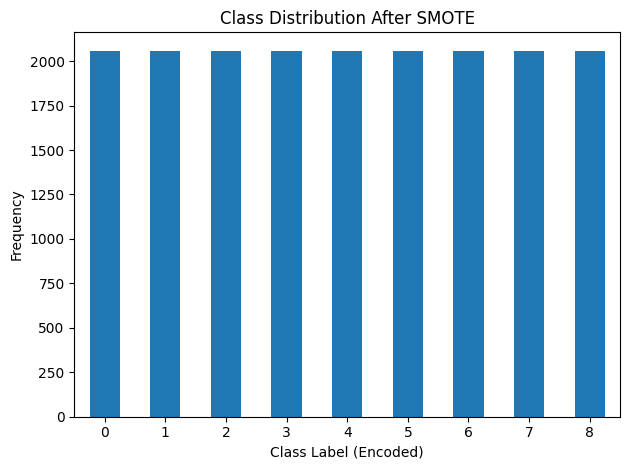

In [7]:


# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

# Create a pandas Series from numeric labels
class_counts_resampled = pd.Series(y_train_resampled).value_counts().sort_index()

# Plot using numeric class labels
class_counts_resampled.plot(kind='bar')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class Label (Encoded)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
#Build MLP Model
input_shape = (X_train_resampled.shape[1],)
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=input_shape, name='Dense1'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu',name='Dense2'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(9, activation='softmax',name='Output')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense1 (Dense)                  │ (None, 128)            │         8,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,673 (69.04 KB)

 Trainable params: 17,673 (69.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train Model
history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val),epochs=40,batch_size=32)

# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/40
580/580 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.3386 - loss: 1.8706 - val_accuracy: 0.8350 - val_loss: 0.8275
Epoch 2/40
580/580 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6415 - loss: 1.0888 - val_accuracy: 0.8840 - val_loss: 0.5923
Epoch 3/40
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7410 - loss: 0.8502 - val_accuracy: 0.9000 - val_loss: 0.4778
Epoch 4/40
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7979 - loss: 0.7034 - val_accuracy: 0.9110 - val_loss: 0.3926
Epoch 5/40
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8399 - loss: 0.5828 - val_accuracy: 0.9282 - val_loss: 0.3399
Epoch 6/40
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8717 - loss: 0.4727 - val_accuracy: 0.9356 - val_loss: 0.3032
Epoch 7/40
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8965 - loss: 0.4072 - val_accuracy: 0.9423 - val_loss: 0.2728
Epoch 8/40
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9090 - loss: 0.3662 - val_accuracy: